In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

from ssd_model import SSD300, SSD512
from ssd_utils import PriorUtil
from utils.model import load_weights

Using TensorFlow backend.


### Data

In [2]:
# Pascal VOC
from data_voc import GTUtility
gt_util = GTUtility('data/VOC2007test/')
#print(gt_util)

In [2]:
# MS COCO
from data_coco import GTUtility
gt_util = GTUtility('data/COCO/', validation=True)
#gt_util = gt_util.convert_to_voc()
#print(gt_util)

### Model

In [3]:
# SDD300
model = SSD300(num_classes=gt_util.num_classes)
weights_path = './models/ssd300_voc_weights_fixed.hdf5'; confidence_threshold = 0.35
#weights_path = './models/ssd300_coco_weights_fixed.hdf5'; confidence_threshold = 0.25

In [3]:
# SSD512
model = SSD512(num_classes=gt_util.num_classes)
weights_path = './models/ssd512_voc_weights_fixed.hdf5'; confidence_threshold = 0.7
#weights_path = './models/ssd512_coco_weights_fixed.hdf5'; confidence_threshold = 0.7

In [4]:
load_weights(model, weights_path)
prior_util = PriorUtil(model)

### Predict

In [5]:
_, inputs, images, data = gt_util.sample_random_batch(batch_size=32, input_size=model.image_size)

In [6]:
# plot ground truth
for i in range(len(images)):
    break
    plt.figure(figsize=[8]*2)
    plt.imshow(images[i])
    gt_util.plot_gt(data[i])
    plt.show()

In [7]:
# plot prior boxes
for m in prior_util.prior_maps:
    break
    plt.figure(figsize=[8]*2)
    plt.imshow(images[0])
    m.plot_locations()
    m.plot_boxes([0, 10, 100])
    plt.show()

In [8]:
preds = model.predict(inputs, batch_size=1, verbose=1)

32/32 [==============================] - 2s 53ms/step


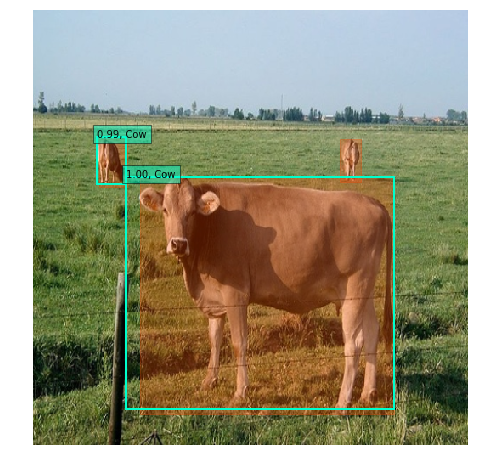

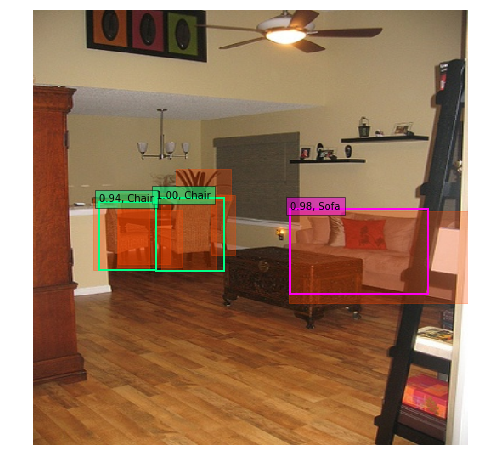

In [9]:
checkdir = os.path.dirname(weights_path)

for fl in glob.glob('%s/result_*' % (checkdir,)):
    #os.remove(fl)
    pass

for i in range(2):
#for i in range(len(preds)):
    plt.figure(figsize=[8]*2)
    plt.imshow(images[i])
    res = prior_util.decode(preds[i], confidence_threshold=confidence_threshold, fast_nms=True)
    prior_util.plot_results(res, classes=gt_util.classes, show_labels=True, gt_data=data[i])
    #prior_util.plot_results(res, classes=gt_util.classes, show_labels=True, gt_data=None)
    plt.axis('off')
    #plt.savefig('%s/result_%03d.jpg' % (checkdir, i))
    plt.show()